In [23]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from lmfit.models import ConstantModel, LinearModel, PolynomialModel
import locan as lc

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [48]:
folder = "/Volumes/guttman/Guoming_Gao-Resnick/Data_BIF/DEFAULT_USER/20250424_ONIdemo_Guoming/Guoming_data/dSTORM/dSTORM_tif/RNF12_XistIn/fov8"
os.chdir(folder)

In [58]:
# dat_left = lc.load_locdata(
#     path="dSTORM_Exp_TX_diff_RNF12_Halo_JF549_XistIntron_AF647-8-cropped-left.csv",
#     file_type=lc.FileType.THUNDERSTORM,
# )
# dat_right = lc.load_locdata(
#     path="dSTORM_Exp_TX_diff_RNF12_Halo_JF549_XistIntron_AF647-8-cropped-right.csv",
#     file_type=lc.FileType.THUNDERSTORM,
# )
dat_ONI = lc.load_locdata(
    path="dSTORM_Exp_TX_diff_RNF12_Halo_JF549_XistIntron_AF647-8.csv",
    file_type=lc.FileType.NANOIMAGER,
    # convert=False,
)

In [59]:
lc.NANOIMAGER_KEYS

{'Channel': 'channel',
 'Frame': 'frame',
 'X (nm)': 'position_x',
 'Y (nm)': 'position_y',
 'Z (nm)': 'position_z',
 'Photons': 'intensity',
 'Background': 'local_background'}

In [60]:
dat_ONI = lc.load_Nanoimager_file(path="dSTORM_Exp_TX_diff_RNF12_Halo_JF549_XistIntron_AF647-8.csv")
dat_ONI.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134310 entries, 0 to 134309
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   position_x                   134310 non-null  float64
 1   position_y                   134310 non-null  float64
 2   z (nm)                       134310 non-null  int64  
 3   background (photons/nm^2)    134310 non-null  float64
 4   sigmaX (nm)                  134310 non-null  float64
 5   sigmaY (nm)                  134310 non-null  float64
 6   intensity (photons)          134310 non-null  float64
 7   logLikelihoodRatioPValue     134310 non-null  float64
 8   channel                      134310 non-null  int8   
 9   frameIndex                   134310 non-null  int64  
 10  localization precision (nm)  134310 non-null  float64
 11  channelName                  0 non-null       float64
dtypes: float64(9), int64(2), int8(1)
memory usage: 11.4 MB


AttributeError: AxesImage.set() got an unexpected keyword argument 'channel'

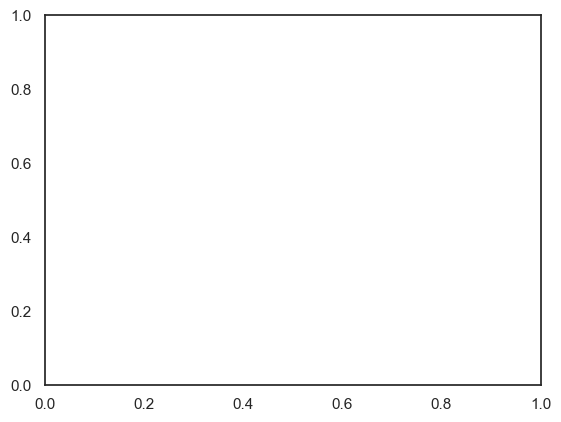

In [ ]:
lc.render_2d(dat_ONI, bin_size=100, channel=0)

In [27]:
drift = lc.Drift(chunk_size=20, target='first', method='cc').compute(dat_left)

/opt/miniconda3/envs/smlm/lib/python3.13/site-packages/locan/analysis/drift.py:265: UserWarning: The function register_cc has been refactored. The kwargs max_offset and verbose are deprecated . It now calls _register_cc_skimage. Use _register_cc_picasso for legacy behavior.
  transformation = register_cc(
/opt/miniconda3/envs/smlm/lib/python3.13/site-packages/locan/analysis/drift.py:265: UserWarning: The function register_cc has been refactored. The kwargs max_offset and verbose are deprecated . It now calls _register_cc_skimage. Use _register_cc_picasso for legacy behavior.
  transformation = register_cc(
/opt/miniconda3/envs/smlm/lib/python3.13/site-packages/locan/analysis/drift.py:265: UserWarning: The function register_cc has been refactored. The kwargs max_offset and verbose are deprecated . It now calls _register_cc_skimage. Use _register_cc_picasso for legacy behavior.
  transformation = register_cc(
/opt/miniconda3/envs/smlm/lib/python3.13/site-packages/locan/analysis/drift.py:

KeyboardInterrupt: 

<Axes: title={'center': 'counts'}, xlabel='position_x', ylabel='position_y'>

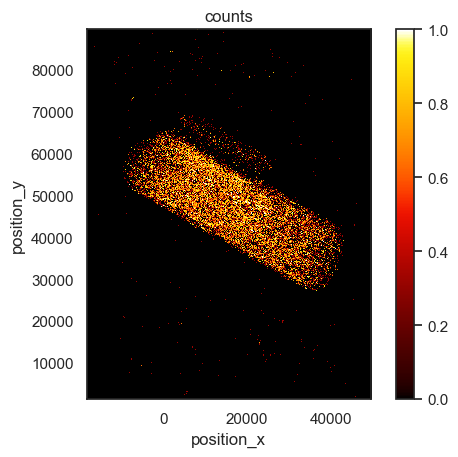

In [25]:
lc.render_2d(drift.locdata_corrected, bin_size=100, rescale=lc.Trafo.EQUALIZE)